In [286]:
# Required Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import plotly.express as px

In [287]:
import joblib

# Save trained Random Forest model
joblib.dump(rf_model, "airbnb_rf_model.pkl")

# Save feature names for later use in prediction
joblib.dump(X.columns.tolist(), "feature_columns.pkl")

['feature_columns.pkl']

In [288]:
# Step 1: Load Data (Las Vegas)
df = pd.read_csv("Resources\lasvegaslistings.csv")  # Replace with actual Las Vegas dataset path

<>:2: SyntaxWarning:

invalid escape sequence '\l'

<>:2: SyntaxWarning:

invalid escape sequence '\l'

C:\Users\denis\AppData\Local\Temp\ipykernel_27424\1341890326.py:2: SyntaxWarning:

invalid escape sequence '\l'



In [289]:
# Step 2: Data Cleaning (simplified example)
df = df[["price", "latitude", "longitude", "room_type", "minimum_nights", "number_of_reviews", "reviews_per_month"]]
df.dropna(inplace=True)
df = df[df["price"] != 0]
df = df[df["minimum_nights"] <= 30]

In [290]:
# Convert price from string to float if needed
df["price"] = df["price"].replace({'$':'', ',':''}, regex=True).astype(float)

In [291]:
# Step 3: Feature Engineering
df = pd.get_dummies(df, columns=["room_type"], drop_first=True)

In [292]:
# Step 4: Train/Test Split
X = df.drop("price", axis=1)
y = df["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [293]:
# Step 5: Model 1 - Random Forest Regressor (default parameters)
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

In [294]:
# Step 6: Model 2 - Linear Regression (baseline model)
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

In [295]:
# Step 7: Evaluation
print("Random Forest Model:")
print("MAE:", mean_absolute_error(y_test, y_pred_rf))
print("RMSE:", mean_squared_error(y_test, y_pred_rf, squared=False))
print("R2 Score:", r2_score(y_test, y_pred_rf))

Random Forest Model:
MAE: 114.54045183253078
RMSE: 489.1162227909234
R2 Score: 0.005288665412875204


c:\Users\denis\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.



In [296]:
print("\nLinear Regression Model:")
print("MAE:", mean_absolute_error(y_test, y_pred_lr))
print("RMSE:", mean_squared_error(y_test, y_pred_lr, squared=False))
print("R2 Score:", r2_score(y_test, y_pred_lr))


Linear Regression Model:
MAE: 134.47397467172192
RMSE: 483.0071441165535
R2 Score: 0.029981447972768027


c:\Users\denis\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.



Text(0.5, 1.0, 'Random Forest Predictions')

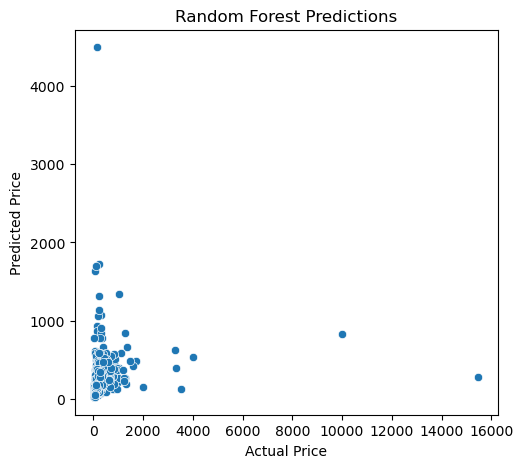

In [297]:
# Step 8: Visualizations
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_test, y=y_pred_rf)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Random Forest Predictions")

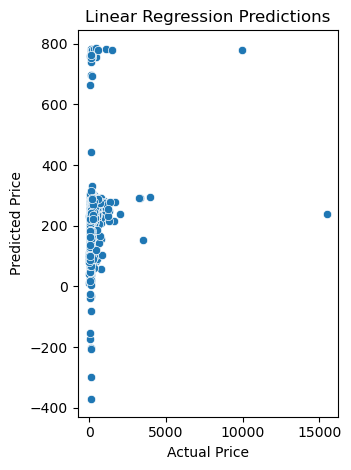

In [298]:
plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test, y=y_pred_lr)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Linear Regression Predictions")
plt.tight_layout()
plt.show()

In [299]:
# Save predictions to CSV
predictions = pd.DataFrame({"Actual": y_test, "RF_Predicted": y_pred_rf, "LR_Predicted": y_pred_lr})
predictions.to_csv("las_vegas_price_model_comparison.csv", index=False)

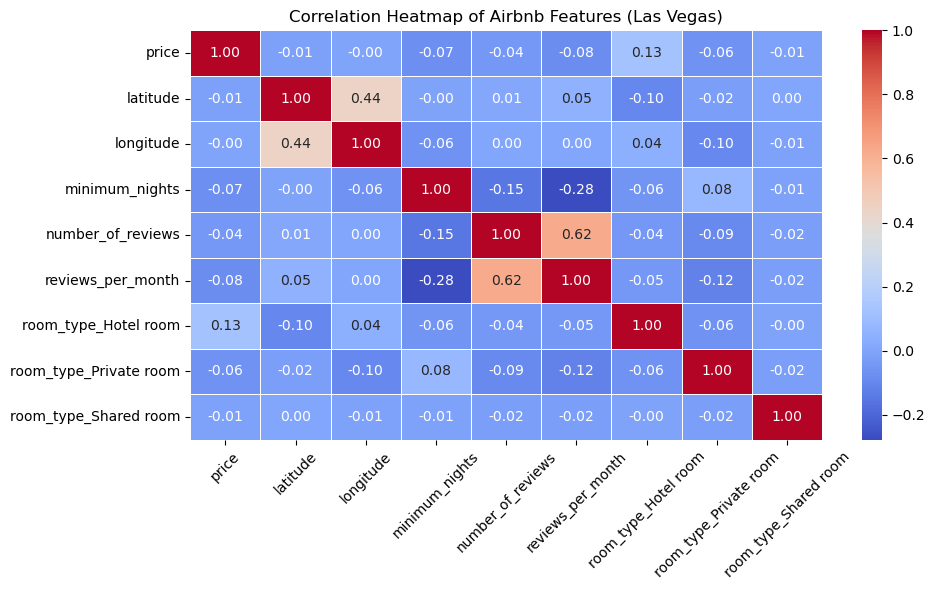

In [300]:
# Step X: Correlation Heatmap
plt.figure(figsize=(10, 6))
correlation_matrix = df.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Airbnb Features (Las Vegas)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [301]:
import plotly.express as px

fig = px.histogram(df, x="price", nbins=50, title="Price Distribution in Las Vegas")
fig.write_json("price_dist.json")


In [302]:
import pandas as pd
import plotly.express as px

feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)
fig = px.bar(x=feature_importances.index, y=feature_importances.values, title="Feature Importances")
fig.write_json("feature_importance.json")


In [303]:
import geopandas as gpd

gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.longitude, df.latitude))
gdf = gdf[["geometry", "price"]]
gdf.to_file("listings.geojson", driver="GeoJSON")


c:\Users\denis\anaconda3\Lib\site-packages\pyogrio\geopandas.py:710: UserWarning:

'crs' was not provided.  The output dataset will not have projection information defined and may not be usable in other systems.

